<h1>The Effect Age & Experience has on Minecraft Player's Total Hours!</h1>

<h1>Introduction</h1>

<p>In this project, we are looking into a dataset collected from player activity on a Minecraft server. Minecraft is a open world survival video game, and player data can provide valuable insight into the video game industry.</p>

<h3>Question:</h3>
<p><b>Can player experience and age accurately predict total played hours on a server?</b></p>


<h3>Data Description</h3>
<p>We are focusing only on the players data set.</p>

<h3>players.csv</h3>
<ul>
    <li>196 Observations</li>
    <h4>Variables:</h4>
    <li>9 Variables</li>
    <li><b>experience: </b>Character, player's experience in Minecraft</li>
    <li><b>subscribe: </b>Boolean, is player subscribed to PlaiCraft's email updates?</li>
    <li><b>hashedEmail: </b>Character, player's email</li>
    <li><b>played_hours: </b>Double, amount of hours player has played on the server</li>
    <li><b>name: </b>Character, name of player</li>
    <li><b>gender: </b>Character, gender of player</li>
    <li><b>age: </b>Double, age of player</li>
    <li><b>individualID:</b> Boolean, ID of player</li>
    <li><b>organizationName:</b> Boolean, player's organization name</li>
    <h4>Potential Issues</h4>
    <li>experience and gender should be categorical (factor) instead of characters</li>
    <li>individualID and organizationName has only N/A values, so these two variables should be disgarded</li>
</ul>





<h1>Methods and Results</h1>

<p>Describe Methods here</p>
<p><b>MAKE SURE TO LABEL VISUALS (ex. Figure 1) and refer back to them in explanations</b></p>

In [39]:
# Load the data set + libraries: 
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library(cowplot)

players_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")

sessions_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<p>PlaceHolder</p>
<p></p>

In [3]:
set.seed(1234)

# Split the data into training and testing data + wrangling
players_data_split <- initial_split(players_data, prop=0.75, strata=played_hours)
players_data_train <- training(players_data_split)
players_data_test <- testing(players_data_split)

# wrangle to tidy

players_data_tidy_train <- players_data_train |>
                        mutate(experience=as_factor(experience)) |>
                        select(experience, age, played_hours)

players_data_tidy_train

experience,age,played_hours
<fct>,<dbl>,<dbl>
Veteran,17,0.0
Regular,21,0.1
Amateur,17,0.0
Regular,19,0.0
Amateur,21,0.0
Amateur,17,0.1
Veteran,22,0.0
Pro,17,0.0
Veteran,17,0.0


<p>PlaceHolder</p>


<h1>asdasdasd</h1>
<p>asdasdsad</p>
<ul>
    <li>as</li>
    <li>ds</li>
</ul>

In [4]:
#Code for Age

<p>PlaceHOlder
</p>

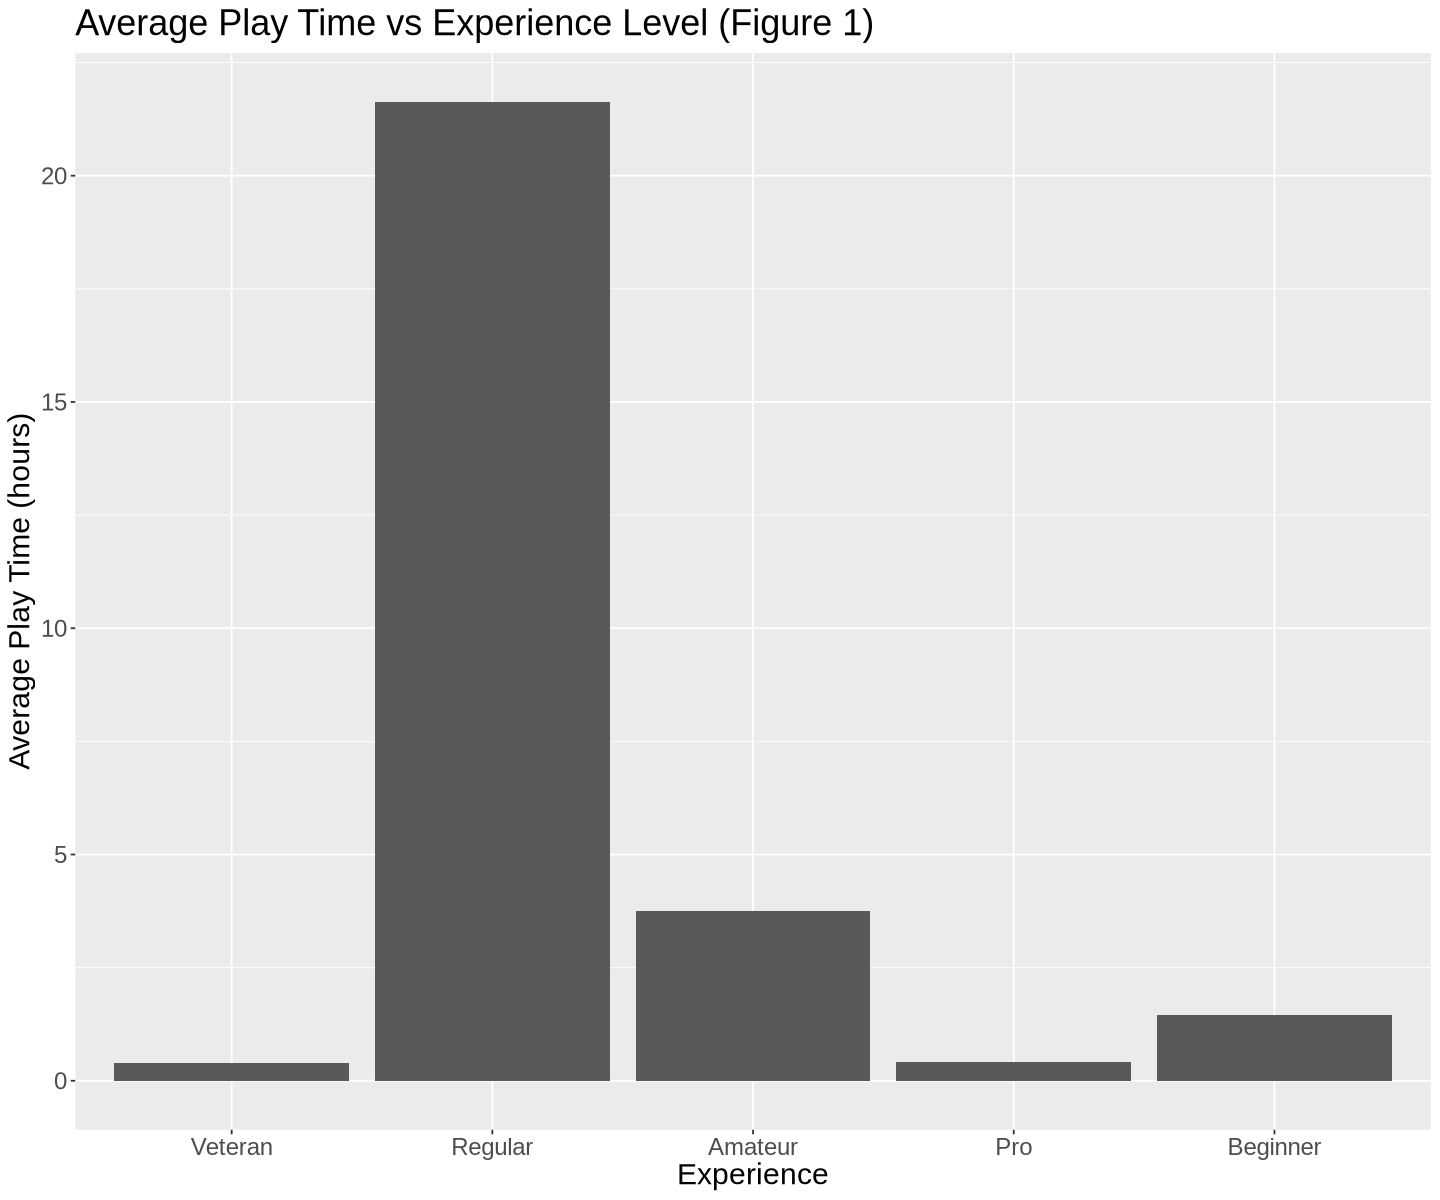

In [55]:
#Code for Experience

options(repr.plot.width = 12, repr.plot.height = 10)

player_data_average_graph <- players_data_tidy_train |>
                        group_by(experience) |>
                        summarize(average = mean(played_hours)) |>  # average play hours for each experience group
                        ggplot(aes(experience, average)) + # graph
                        geom_bar(stat="identity") +
                        labs(x="Experience", y="Average Play Time (hours)", title="Average Play Time vs Experience Level (Figure 1)") +
                        theme(text=element_text(size=18))

player_data_average_graph


<h3>FIGURE 1</h3>
<p>In Figure 1, the Minecraft players with the a regular experience level have a significantly higher total played time on average compared to the other experience levels. Therefore, the KNN regression will most likely predict for Minecraft players with a regular experience level to have high total played time.</p>

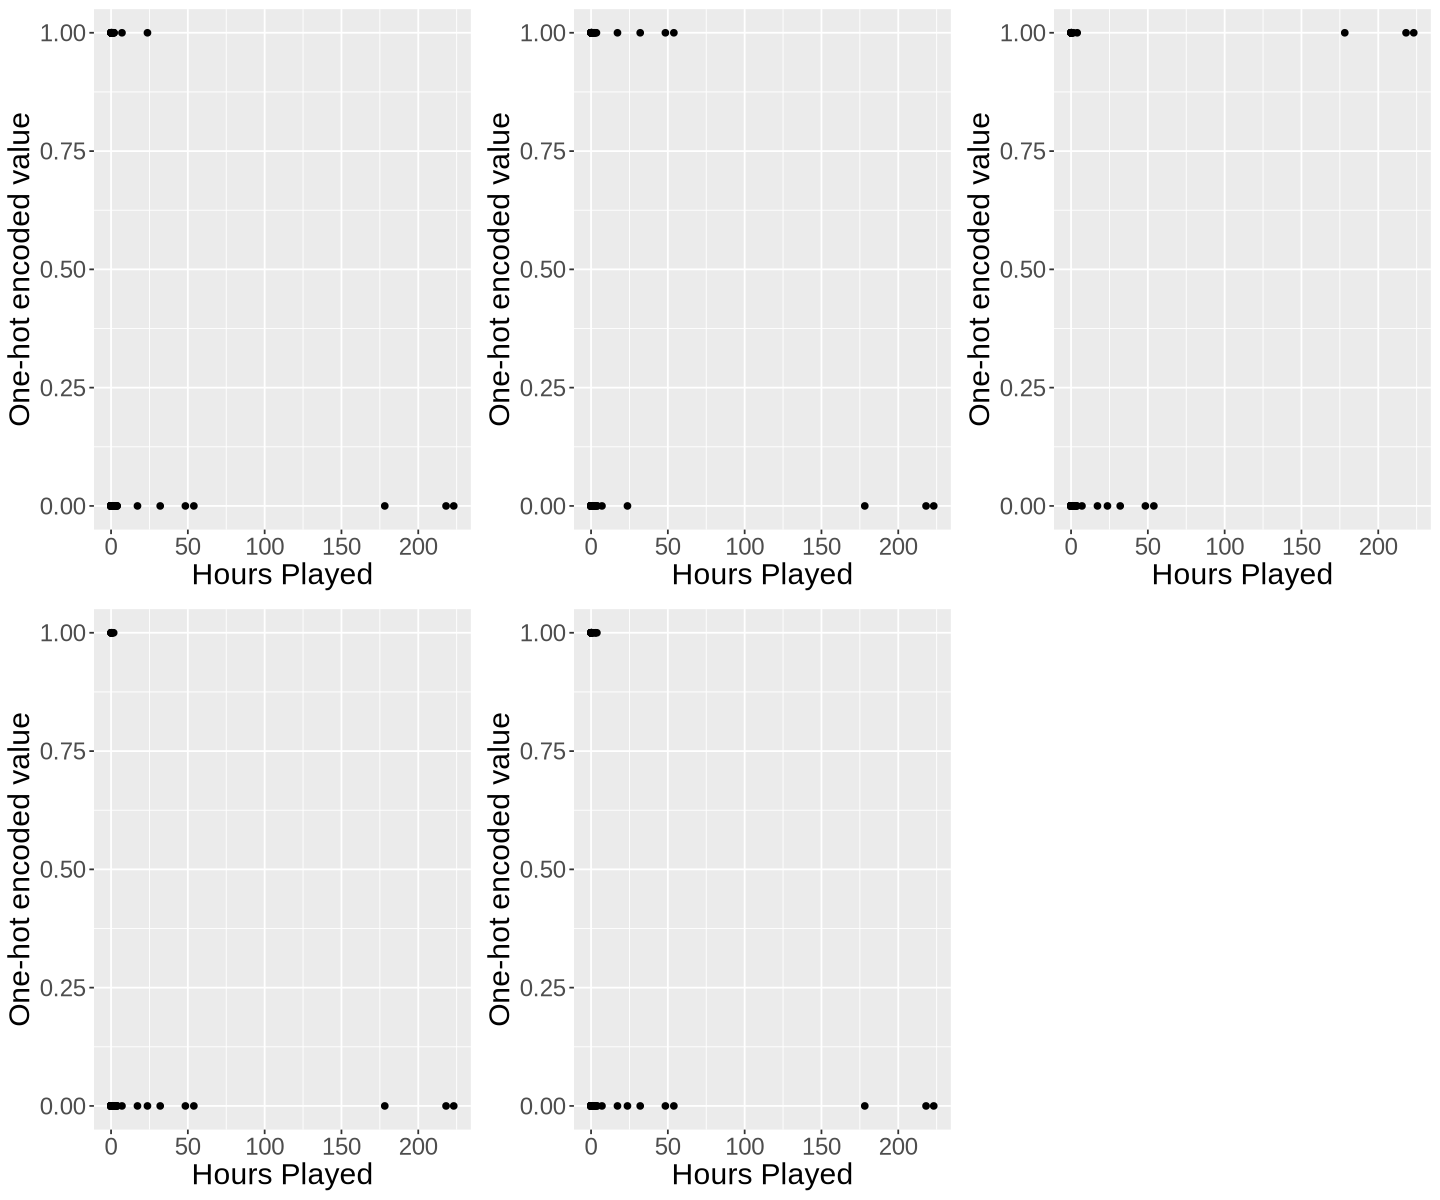

In [59]:
player_data_one_hot_encoding <- dummyVars(" ~ experience ", data=players_data_tidy_train) # one-hot encoding the data to convert categorical to numerical

encoded_player_data <- predict(player_data_one_hot_encoding, newdata=players_data_tidy_train) 

encoded_player_data <- cbind(players_data_tidy_train, encoded_player_data)

Veteran_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Veteran)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value") +
                            theme(text=element_text(size=18))

Regular_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Regular)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value") +
                            theme(text=element_text(size=18))

Amateur_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Amateur)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value") +
                            theme(text=element_text(size=18))

Pro_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Pro)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value") +
                            theme(text=element_text(size=18))

Beginner_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Beginner)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value") +
                            theme(text=element_text(size=18))

encoded_player_graph <- plot_grid(
    Beginner_encoded_graph,
    Amateur_encoded_graph,
    Regular_encoded_graph,
    Pro_encoded_graph,
    Veteran_encoded_graph) 


#encoded_player_graph
encoded_player_graph

<h3>FIGURE 2</h3>
<p>a</p>

In [6]:
# Code for Regression

<p>PlaceHOlder</p>

<h1>Discussion</h1>

<p>summarize what you found (Jacob)</p>

<p>discuss whether this is what you expected to find? (Alex)</p>

<p>discuss what impact could such findings have?</p>

<p>discuss what future questions could this lead to?</p>

<h1>References</h1>

<p>APA format??????</p>